<a href="https://colab.research.google.com/github/heesoo-jang/comp664-deep-learning-spring-2023/blob/main/Copy_of_Homework_1_HeesooJang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_data():
    size = 1000
    x = np.linspace(0, 1, size)
    y = -10*x + 5
    y += 15*np.logical_and(x > 0.75, x < 0.8).astype(float)
    return x, y

# 1. Inspect the data (0.5 points)

Using `matplotlib`, create a scatter plot of the data returned by `generate_data()`.
What is out of the ordinary about this line?

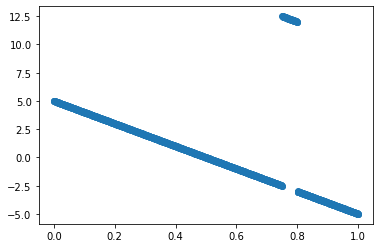

In [3]:
x, y = generate_data()
plt.scatter(x, y)
plt.show()

Part of the data is not on the linear regression line.

# 2. Implement linear regression (2 points)

Implement a basic linear regression model which is fit to the data from `generate_data` using gradient descent.
Your model should take the form `y = m*x + b`, where `y` is the output, `x` is the input, `m` is a weight parameter, and `b` is a bias parameter.
You must use only `numpy` and derive any derivatives yourself (i.e. no autograd from TensorFlow, MXNet, Pytorch, JAX etc!).
You should use a squared-error loss function.
You are welcome to use any technique you want to decide when to stop training.
Make sure you tune your optimization hyperparameters so that the model converges.
Print out or plot the loss over the course of training.

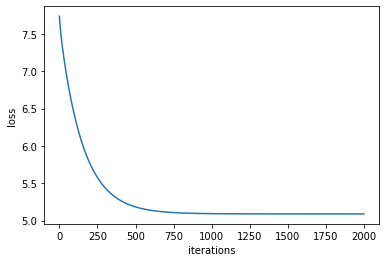

In [16]:
def linear_regression_loss2(x, y, m, b, learning_rate=0.05, num_iterations=2000):
    N = len(x)
    losses = []
    for i in range(num_iterations):
        y_pred = m*x + b
        loss = (1/(2*N))*np.sum((y - y_pred)**2)
        losses.append(loss)
        dm = -(1/N)*np.sum(x*(y - y_pred)) # partial derivative of loss in respect to m 
        db = -(1/N)*np.sum(y - y_pred)  # partial derivative of loss in respect to b 
        m = m - learning_rate*dm  # update m
        b = b - learning_rate*db # update b
    return m, b, losses

x, y = generate_data() # ground truth data 
m, b, losses = linear_regression_loss2(x, y, 0, 0) # linear regression result

plt.plot(losses)
plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()

# 3. Analyze the result (0.5 points)

Print out the values of `w` and `b` found by your model after training and compare them to the ground truth values (which can be found inside the code of the `generate_data` function).
Are they close?
Recreate the scatter plot you generated in question 1 and plot the model as a line on the same plot.
What went wrong?


In [17]:
print("m: ", m)
print("b: ", b)

m:  -7.516936911827485
b:  4.508096990572267


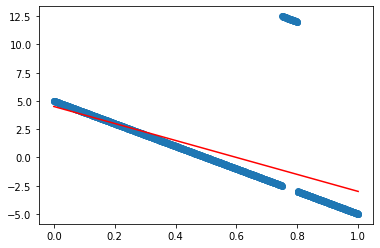

In [18]:
plt.scatter(x, y)
plt.plot(x, m*x + b, color='red')
plt.show()

# 4. "Robust" linear regression (0.5 points)

Implement a linear regression model exactly like the one you created in question 2, except using a L1 loss (absolute difference) instead of a squared L2 loss (squared error).
You should be able to copy and paste your code from question 2 and only change a few lines.
Print out or plot the loss over the course of training.
What is different about the loss trajectory compared to the squared-error linear regression?

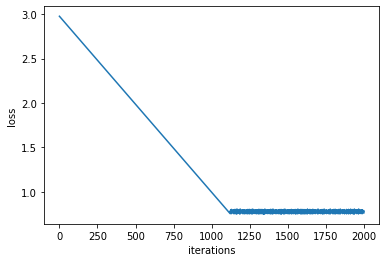

In [12]:
def linear_regression_loss1(x, y, m, b, learning_rate=0.05, num_iterations=2000):
    N = len(x)
    losses = []
    for i in range(num_iterations):
        y_pred = m*x + b
        loss = (1/N)*np.sum(np.abs(y - y_pred)) # mean absolute error
        losses.append(loss)
        dm = -(1/N)*np.sum(x*np.sign(y - y_pred)) # partial derivative of loss in respect to m 
        db = -(1/N)*np.sum(np.sign(y - y_pred))  # partial derivative of loss in respect to b 
        m = m - learning_rate*dm  # update m
        b = b - learning_rate*db # update b
    return m, b, losses

x, y = generate_data() # ground truth data 
m, b, losses = linear_regression_loss1(x, y, 0, 0) # linear regression result

plt.plot(losses)
plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()

# 5. Analyze the result (0.5 points)

Print out the new values of `w` and `b` found by your model after training.
Are they closer to the true values used in `generate_data`?
Plot the model as a line again.
Why do you think the behavior is different?

In [13]:
print("m: ", m)
print("b: ", b)

m:  -9.971100800800565
b:  5.037100000000028


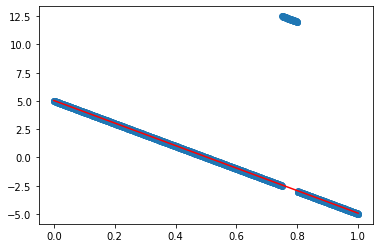

In [14]:
plt.scatter(x, y)
plt.plot(x, m*x + b, color='red')
plt.show()

The loss function using L2 loss is more sensitive to outlier data than the loss function using L1 loss.